In [38]:
import pyarrow.parquet as pq

In [39]:
# Read
table = pq.read_table('s3://ubs-datasets/bigearthnet/metadata.parquet')
table

pyarrow.Table
patch_id: string
labels: list<element: string>
  child 0, element: string
split: string
country: string
s1_name: string
s2v1_name: string
contains_seasonal_snow: bool
contains_cloud_or_shadow: bool
----
patch_id: [["S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57","S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_27_55","S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_27_56","S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_27_57","S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_27_58",...,"S2A_MSIL2A_20171208T093351_N9999_R136_T34TEN_67_77","S2A_MSIL2A_20171208T093351_N9999_R136_T34TEN_67_78","S2A_MSIL2A_20171208T093351_N9999_R136_T34TEN_67_79","S2A_MSIL2A_20171208T093351_N9999_R136_T34TEN_67_80","S2A_MSIL2A_20171208T093351_N9999_R136_T34TEN_67_81"],["S2A_MSIL2A_20171208T093351_N9999_R136_T34TEN_67_82","S2A_MSIL2A_20171208T093351_N9999_R136_T34TEN_67_83","S2A_MSIL2A_20171208T093351_N9999_R136_T34TEN_67_84","S2A_MSIL2A_20171208T093351_N9999_R136_T34TEN_67_85","S2A_MSIL2A_20171208T09

In [40]:
pandas_df = table.to_pandas()
pandas_df.head()

,patch_id,labels,split,country,s1_name,s2v1_name,contains_seasonal_snow,contains_cloud_or_shadow
0,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[Arable land, Broad-leaved forest, Mixed fores...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_26_57,S2A_MSIL2A_20170613T101031_26_57,False,False
1,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[Arable land, Broad-leaved forest, Inland wate...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_55,S2A_MSIL2A_20170613T101031_27_55,False,False
2,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[Arable land, Broad-leaved forest, Coniferous ...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_56,S2A_MSIL2A_20170613T101031_27_56,False,False
3,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[Broad-leaved forest, Complex cultivation patt...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_57,S2A_MSIL2A_20170613T101031_27_57,False,False
4,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[Broad-leaved forest, Complex cultivation patt...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_58,S2A_MSIL2A_20170613T101031_27_58,False,False


In [ ]:
import pyarrow.compute as pc

# Extract the prefix up to the timestamp for s1_name
s1_prefix = pc.replace_substring_regex(table['s1_name'], r'((?:[^_]+_){4}[^_]+)_.*', r'\1')

# folder S1 path column
s1_path = pc.binary_join_element_wise("s3://ubs-datasets/bigearthnet/BigEarthNet-S1/", s1_prefix, '')
s1_path_ = pc.binary_join_element_wise(s1_path, table['s1_name'], '/')

# Extract the prefix up to the timestamp for s2 (using patch_id )
s2_prefix = pc.replace_substring_regex(table['patch_id'], r'((?:[^_]+_){5}[^_]+)_.*', r'\1')

# folder s2 path column
s2_path = pc.binary_join_element_wise("s3://ubs-datasets/bigearthnet/BigEarthNet-S2/", s2_prefix,'')
s2_path_ = pc.binary_join_element_wise(s2_path, table['patch_id'], '/')

# folder reference path column
ref_path = pc.binary_join_element_wise("s3://ubs-datasets/bigearthnet/Reference_Maps/", s2_prefix, '')
ref_path_ = pc.binary_join_element_wise(ref_path, table['patch_id'], '/')


table = table.append_column('s1_path', s1_path_)
table = table.append_column('s2_path', s2_path_)
table = table.append_column('reference_path', ref_path_)


In [44]:
pandas_df = table.to_pandas()
pandas_df.head()

,patch_id,labels,split,country,s1_name,s2v1_name,contains_seasonal_snow,contains_cloud_or_shadow,patch_id_small,patch_id_small,s1_path,s2_path,reference_path
0,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[Arable land, Broad-leaved forest, Mixed fores...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_26_57,S2A_MSIL2A_20170613T101031_26_57,False,False,33UUP_26_57,33UUP_26_57,s3://ubs-datasets/bigearthnet/BigEarthNet-S1/S...,s3://ubs-datasets/bigearthnet/BigEarthNet-S2/S...,s3://ubs-datasets/bigearthnet/Reference_Maps/S...
1,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[Arable land, Broad-leaved forest, Inland wate...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_55,S2A_MSIL2A_20170613T101031_27_55,False,False,33UUP_27_55,33UUP_27_55,s3://ubs-datasets/bigearthnet/BigEarthNet-S1/S...,s3://ubs-datasets/bigearthnet/BigEarthNet-S2/S...,s3://ubs-datasets/bigearthnet/Reference_Maps/S...
2,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[Arable land, Broad-leaved forest, Coniferous ...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_56,S2A_MSIL2A_20170613T101031_27_56,False,False,33UUP_27_56,33UUP_27_56,s3://ubs-datasets/bigearthnet/BigEarthNet-S1/S...,s3://ubs-datasets/bigearthnet/BigEarthNet-S2/S...,s3://ubs-datasets/bigearthnet/Reference_Maps/S...
3,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[Broad-leaved forest, Complex cultivation patt...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_57,S2A_MSIL2A_20170613T101031_27_57,False,False,33UUP_27_57,33UUP_27_57,s3://ubs-datasets/bigearthnet/BigEarthNet-S1/S...,s3://ubs-datasets/bigearthnet/BigEarthNet-S2/S...,s3://ubs-datasets/bigearthnet/Reference_Maps/S...
4,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[Broad-leaved forest, Complex cultivation patt...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_58,S2A_MSIL2A_20170613T101031_27_58,False,False,33UUP_27_58,33UUP_27_58,s3://ubs-datasets/bigearthnet/BigEarthNet-S1/S...,s3://ubs-datasets/bigearthnet/BigEarthNet-S2/S...,s3://ubs-datasets/bigearthnet/Reference_Maps/S...


#### save the metadata to s3 

In [ ]:
# save
# pq.write_table(table, 's3://ubs-homes/erasmus/ethel/bigearth/metadata.parquet')

#### lets check if the folder structure produced are right and exists 

In [25]:
import boto3

s3_client = boto3.client('s3')

def check_s3_folder_exists(s3_path):
    if not s3_path or not isinstance(s3_path, str) or not s3_path.startswith('s3://'):
        return False
    
    path_parts = s3_path.replace('s3://', '').split('/', 1)
    bucket = path_parts[0]
    prefix = path_parts[1] if len(path_parts) > 1 else ''
    
    if not prefix.endswith('/'):
        prefix += '/'
    
    response = s3_client.list_objects_v2(Bucket=bucket, Prefix=prefix, MaxKeys=1)
    return 'Contents' in response

df = table.to_pandas()

for idx in range(min(5, len(df))):
    row = df.iloc[idx]
    
    s1_exists = check_s3_folder_exists(row['s1_path'])
    s2_exists = check_s3_folder_exists(row['s2_path'])
    ref_exists = check_s3_folder_exists(row['reference_path'])
    
    print(f"Row {idx}:")
    print(f"  S1 path: {row['s1_path']} - {'EXISTS' if s1_exists else 'NOT FOUND'}")
    print(f"  S2 path: {row['s2_path']} - {'EXISTS' if s2_exists else 'NOT FOUND'}")
    print(f"  Ref path: {row['reference_path']} - {'EXISTS' if ref_exists else 'NOT FOUND'}")
    print()

Row 0:
  S1 path: s3://ubs-datasets/bigearthnet/BigEarthNet-S1/S1B_IW_GRDH_1SDV_20170612T165809/S1B_IW_GRDH_1SDV_20170612T165809_33UUP_26_57 - EXISTS
  S2 path: s3://ubs-datasets/bigearthnet/BigEarthNet-S2/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57 - EXISTS
  Ref path: s3://ubs-datasets/bigearthnet/Reference_Maps/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57 - EXISTS

Row 1:
  S1 path: s3://ubs-datasets/bigearthnet/BigEarthNet-S1/S1B_IW_GRDH_1SDV_20170612T165809/S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_55 - EXISTS
  S2 path: s3://ubs-datasets/bigearthnet/BigEarthNet-S2/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_27_55 - EXISTS
  Ref path: s3://ubs-datasets/bigearthnet/Reference_Maps/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_27_55 - EXISTS

Row 2:
  S1 path: s3://ubs-datasets/bigearthnet/BigE

In [47]:
df.columns

Index(['patch_id', 'labels', 'split', 'country', 's1_name', 's2v1_name',
       'contains_seasonal_snow', 'contains_cloud_or_shadow', 's1_path',
       's2_path', 'reference_path'],
      dtype='object')

### lets read the data form s3 and try to visualize the contents 

bigearthnet/BigEarthNet-S1/S1B_IW_GRDH_1SDV_20170612T165809/S1B_IW_GRDH_1SDV_20170612T165809_33UUP_26_57/S1B_IW_GRDH_1SDV_20170612T165809_33UUP_26_57_VV.tif
bigearthnet/BigEarthNet-S2/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57_B04.tif
bigearthnet/BigEarthNet-S2/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57_B03.tif
bigearthnet/BigEarthNet-S2/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57_B02.tif
bigearthnet/Reference_Maps/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57_reference_map.tif
bigearthnet/BigEarthNet-S1/S1B_IW_GRDH_1SDV_20170612T165809/S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_55/

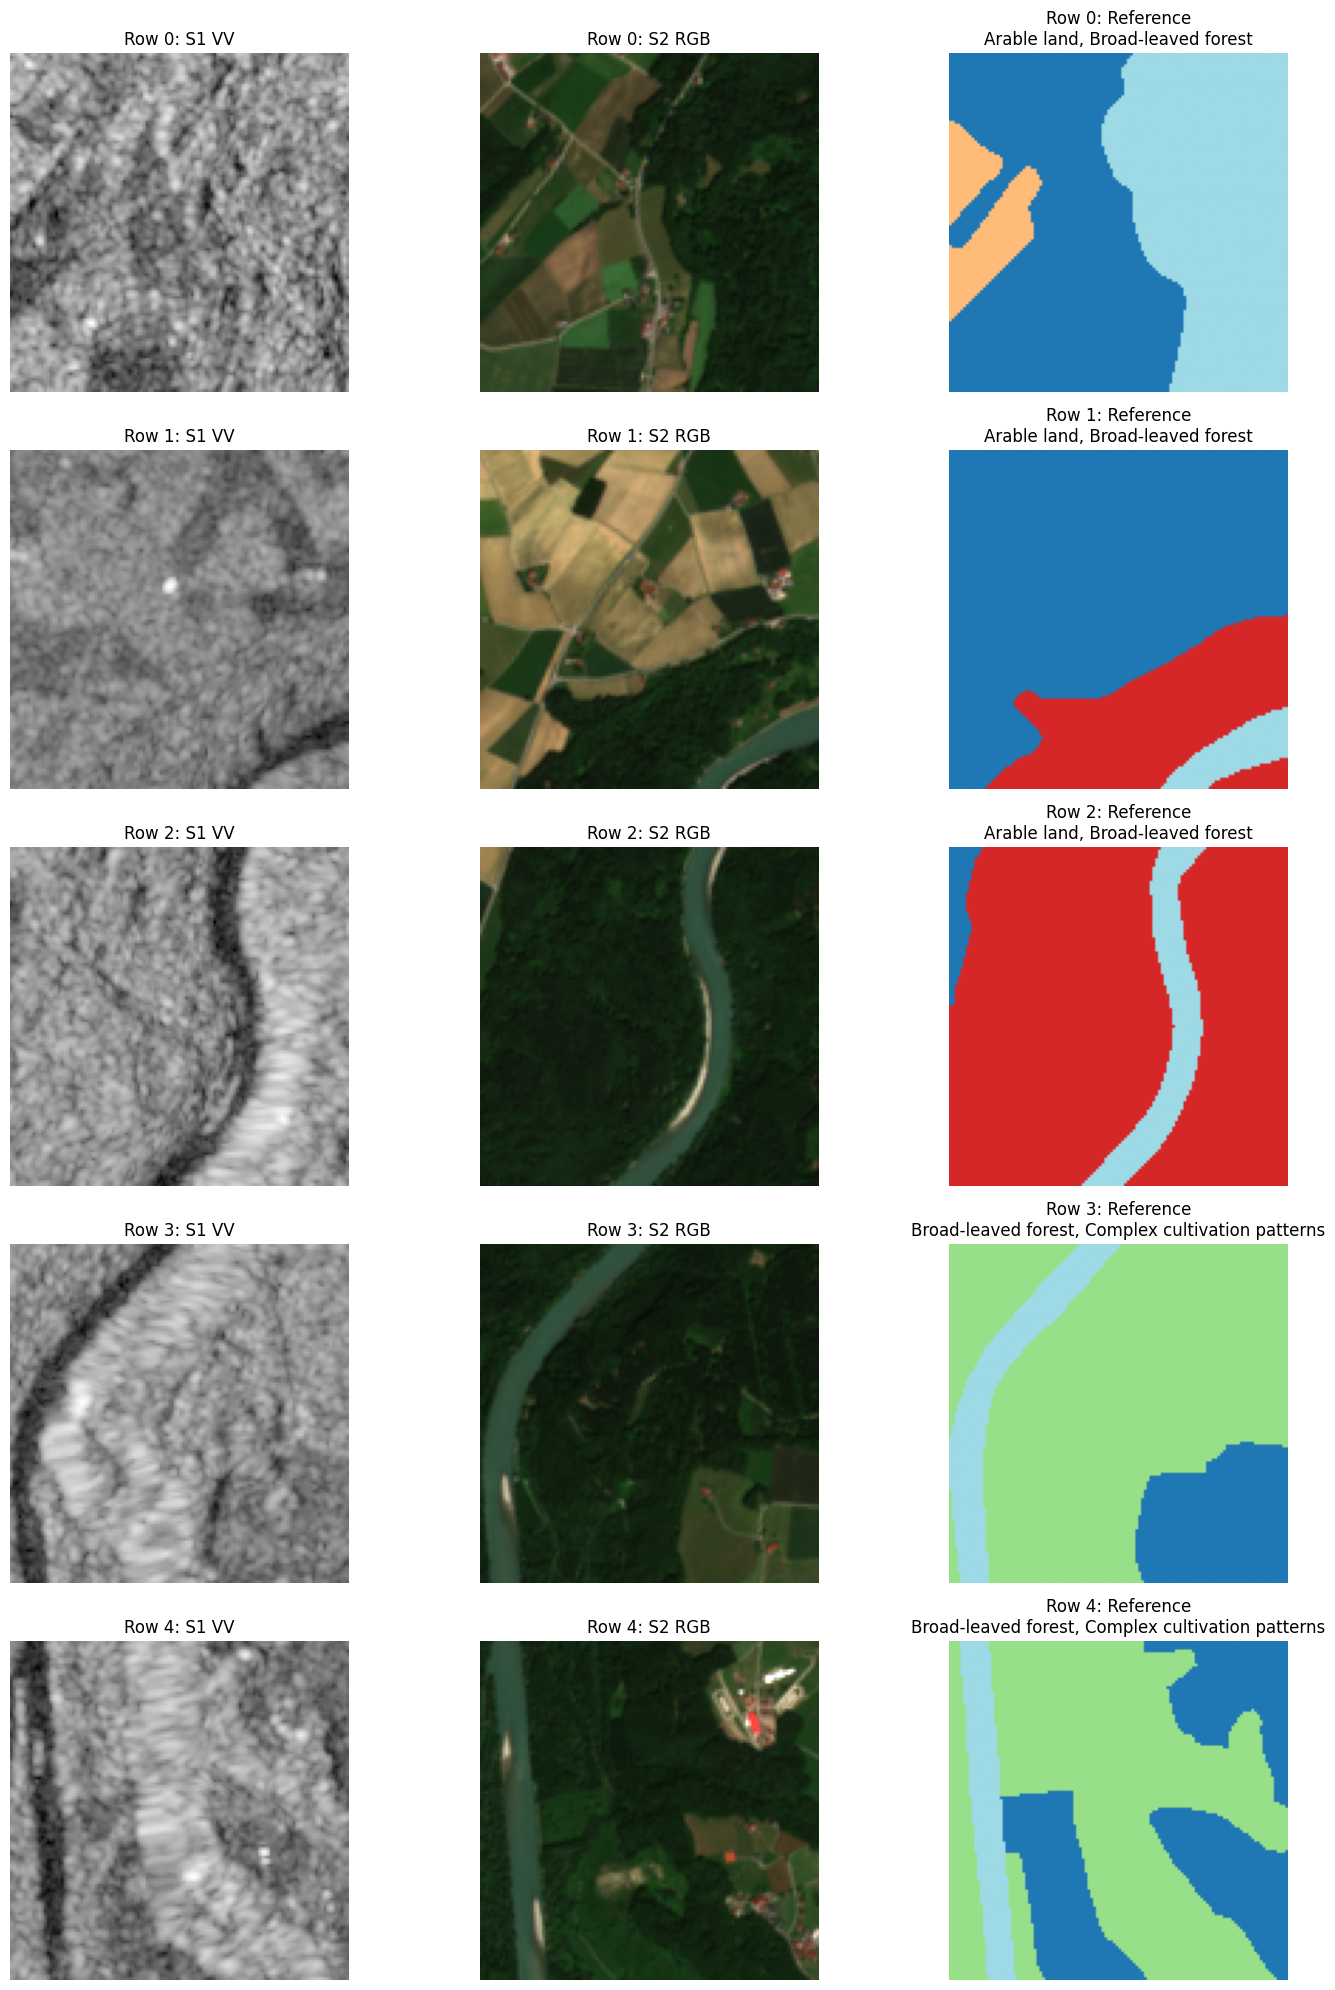

In [49]:
from rasterio.io import MemoryFile
import matplotlib.pyplot as plt
import numpy as np 

def read_s3_tif(s3_path):
    bucket, key = s3_path.replace('s3://', '').split('/', 1)
    print(key)
    obj = s3_client.get_object(Bucket=bucket, Key=key)
    with MemoryFile(obj['Body'].read()) as memfile:
        with memfile.open() as dataset:
            return dataset.read()
    
        
fig, axes = plt.subplots(5, 3, figsize=(15, 20))

for idx in range(5):
    row = df.iloc[idx]
    
    s1_vv = read_s3_tif(f"{row['s1_path']}/{row['s1_name']}_VV.tif")
    axes[idx, 0].imshow(s1_vv[0], cmap='gray')
    axes[idx, 0].set_title(f"Row {idx}: S1 VV")
    axes[idx, 0].axis('off')
    
    s2_rgb = np.stack([read_s3_tif(f"{row['s2_path']}/{row['patch_id']}_{b}.tif")[0] for b in ['B04', 'B03', 'B02']], axis=-1)
    s2_rgb = np.clip(s2_rgb / 3000, 0, 1)
    axes[idx, 1].imshow(s2_rgb)
    axes[idx, 1].set_title(f"Row {idx}: S2 RGB")
    axes[idx, 1].axis('off')
    
    ref = read_s3_tif(f"{row['reference_path']}/{row['patch_id']}_reference_map.tif")
    axes[idx, 2].imshow(ref[0], cmap='tab20')
    axes[idx, 2].set_title(f"Row {idx}: Reference\n{', '.join(row['labels'][:2])}")
    axes[idx, 2].axis('off')

plt.tight_layout()
plt.show()